In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas import Series, DataFrame
import scipy
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets
from sklearn.tree import plot_tree
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

In [4]:
df = pd.read_csv('C2T1_data.csv')

In [5]:
##Pandas profiling issues 
#pandas_profiling.ProfileReport(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      3670 non-null   object
 1   X2      3670 non-null   object
 2   X3      3670 non-null   object
 3   X4      3670 non-null   object
 4   X5      3670 non-null   object
 5   X6      3670 non-null   object
 6   X7      3670 non-null   object
 7   X8      3670 non-null   object
 8   X9      3670 non-null   object
 9   X10     3670 non-null   object
 10  X11     3670 non-null   object
 11  X12     3670 non-null   object
 12  X13     3670 non-null   object
 13  X14     3670 non-null   object
 14  X15     3670 non-null   object
 15  X16     3670 non-null   object
 16  X17     3670 non-null   object
 17  X18     3670 non-null   object
 18  X19     3670 non-null   object
 19  X20     3670 non-null   object
 20  X21     3670 non-null   object
 21  X22     3670 non-null   object
 22  X23     3670 non-null   

In [7]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [8]:
df.notnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         X1    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...   X15  \
0     True  True  True  True  True  True  True  True  True  True  ...  True   
1     True  True  True  True  True  True  True  True  True  True  ...  True   
2     True  True  True  True  True  True  True  True  True  True  ...  True   
3     True  True  True  True  True  True  True  True  True  True  ...  True   
4     True  True  True  True  True  True  True  True  True  True  ...  True   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3665  True  True  True  True  True  True  True  True  True  True  ...  True   
3666  True  True  True  True  True  True  True  True  True  True  ...  True   
3667  True  True  True  True  True  True  True  True  True  True  ...  True   
3668  True  True  True  True  True  True  True  True  True  True  ...  True   
3669  True  True  True  True  True  True  True  True  True  True  ...

In [9]:
##Issues with data around 2397th row with manipulation - attempting to view this row of data to get a better understanding of issue
print(df.iloc[2395:2400 ]) 

             X1      X2           X3        X4   X5     X6     X7     X8  \
2395     130000  female   university         2   24      1     -2     -1   
2396     110000  female  high school         1   27      0      0      0   
2397     200000    male   university         1   29      0      0      0   
2398  LIMIT_BAL     SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
2399      20000  female   university         1   24      2      2     -1   

         X9    X10  ...        X15        X16        X17       X18       X19  \
2395     -1     -1  ...         -3        998        937         0      3372   
2396      0      0  ...      47316      47175      47141      2326      3000   
2397      2      2  ...      48367      49366      47539      2078      3900   
2398  PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
2399     -1     -2  ...          0          0          0         0       689   

           X20       X21       X22       X23                  

In [10]:
##Dropping row 2398 as that row was a duplicated header and caused issues with converting data from object to numeric values
df = df.drop(df.index[2398])

In [11]:
##Removing NaN
df = df.dropna()
df = df.dropna(axis=0)

In [12]:
print(df.iloc[2395:2400 ]) 

          X1      X2           X3 X4  X5  X6  X7  X8  X9 X10  ...    X15  \
2395  130000  female   university  2  24   1  -2  -1  -1  -1  ...     -3   
2396  110000  female  high school  1  27   0   0   0   0   0  ...  47316   
2397  200000    male   university  1  29   0   0   0   2   2  ...  48367   
2399   20000  female   university  1  24   2   2  -1  -1  -2  ...      0   
2400  120000  female   university  2  26  -1   2   0   0   0  ...   3272   

        X16    X17   X18   X19   X20   X21   X22   X23            Y  
2395    998    937     0  3372     0  1001   939  1013  not default  
2396  47175  47141  2326  3000  1807  1698  1911  1808  not default  
2397  49366  47539  2078  3900  1900  1904    12  5224  not default  
2399      0      0     0   689     0     0     0     0      default  
2400   3455   3261     0  1000  1000  1000     0  2000      default  

[5 rows x 24 columns]


In [13]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [14]:
cols = ['X1', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

In [15]:
##Changing certain columns from objects to numeric values
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [16]:
##Dropping the first row as converting to numeric values turned header names to NaN
df = df.drop(df.index[0])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 1 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3668 non-null   float64
 1   X2      3668 non-null   object 
 2   X3      3668 non-null   object 
 3   X4      3668 non-null   float64
 4   X5      3668 non-null   float64
 5   X6      3668 non-null   float64
 6   X7      3668 non-null   float64
 7   X8      3668 non-null   float64
 8   X9      3668 non-null   float64
 9   X10     3668 non-null   float64
 10  X11     3668 non-null   float64
 11  X12     3668 non-null   float64
 12  X13     3668 non-null   float64
 13  X14     3668 non-null   float64
 14  X15     3668 non-null   float64
 15  X16     3668 non-null   float64
 16  X17     3668 non-null   float64
 17  X18     3668 non-null   float64
 18  X19     3668 non-null   float64
 19  X20     3668 non-null   float64
 20  X21     3668 non-null   float64
 21  X22     3668 non-null   float64
 22  

In [18]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,female,university,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
2,120000.0,female,university,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
3,90000.0,female,university,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,not default
4,50000.0,female,university,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
5,50000.0,male,university,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,not default


In [19]:
## Dropping duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2396 non-null   float64
 1   X2      2396 non-null   object 
 2   X3      2396 non-null   object 
 3   X4      2396 non-null   float64
 4   X5      2396 non-null   float64
 5   X6      2396 non-null   float64
 6   X7      2396 non-null   float64
 7   X8      2396 non-null   float64
 8   X9      2396 non-null   float64
 9   X10     2396 non-null   float64
 10  X11     2396 non-null   float64
 11  X12     2396 non-null   float64
 12  X13     2396 non-null   float64
 13  X14     2396 non-null   float64
 14  X15     2396 non-null   float64
 15  X16     2396 non-null   float64
 16  X17     2396 non-null   float64
 17  X18     2396 non-null   float64
 18  X19     2396 non-null   float64
 19  X20     2396 non-null   float64
 20  X21     2396 non-null   float64
 21  X22     2396 non-null   float64
 22  

In [20]:
##Converting Gender, Education, Default into string datatypes for further conversion
df = df.astype({"X2": str, "X3": str, "Y": str}, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2396 non-null   float64
 1   X2      2396 non-null   object 
 2   X3      2396 non-null   object 
 3   X4      2396 non-null   float64
 4   X5      2396 non-null   float64
 5   X6      2396 non-null   float64
 6   X7      2396 non-null   float64
 7   X8      2396 non-null   float64
 8   X9      2396 non-null   float64
 9   X10     2396 non-null   float64
 10  X11     2396 non-null   float64
 11  X12     2396 non-null   float64
 12  X13     2396 non-null   float64
 13  X14     2396 non-null   float64
 14  X15     2396 non-null   float64
 15  X16     2396 non-null   float64
 16  X17     2396 non-null   float64
 17  X18     2396 non-null   float64
 18  X19     2396 non-null   float64
 19  X20     2396 non-null   float64
 20  X21     2396 non-null   float64
 21  X22     2396 non-null   float64
 22  

In [21]:
##Mapping then converting gender into numerical values based on these mappings
gender_mapping = {
    'female':(2),
    'male':(1)}
df['X2'] = df['X2'].map(gender_mapping)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,2,university,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
2,120000.0,2,university,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
3,90000.0,2,university,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,not default
4,50000.0,2,university,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
5,50000.0,1,university,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,not default


In [22]:
##Mapping then converting education into numerical values based on these mappings
edu_mapping = {
    'university':(2),
    'graduate school':(1),
    'high school':(3),
    'other':(4)}
df['X3'] = df['X3'].map(edu_mapping)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,2,2,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
2,120000.0,2,2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
3,90000.0,2,2,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,not default
4,50000.0,2,2,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
5,50000.0,1,2,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,not default


In [23]:
##Mapping then converting education into numerical values based on these mappings
def_mapping = {
    'default':(1),
    'not default':(0)}
df['Y'] = df['Y'].map(def_mapping)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,2,2,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
##Converting Gender, Education, Default from string into integers
df = df.astype({"X2": int, "X3": int, "Y": int}, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2396 non-null   float64
 1   X2      2396 non-null   int32  
 2   X3      2396 non-null   int32  
 3   X4      2396 non-null   float64
 4   X5      2396 non-null   float64
 5   X6      2396 non-null   float64
 6   X7      2396 non-null   float64
 7   X8      2396 non-null   float64
 8   X9      2396 non-null   float64
 9   X10     2396 non-null   float64
 10  X11     2396 non-null   float64
 11  X12     2396 non-null   float64
 12  X13     2396 non-null   float64
 13  X14     2396 non-null   float64
 14  X15     2396 non-null   float64
 15  X16     2396 non-null   float64
 16  X17     2396 non-null   float64
 17  X18     2396 non-null   float64
 18  X19     2396 non-null   float64
 19  X20     2396 non-null   float64
 20  X21     2396 non-null   float64
 21  X22     2396 non-null   float64
 22  

In [25]:
##Renaming header column names
df.rename(columns={'X1': 'Limit_Balance', 
                   'X2': 'Sex', 
                   'X3': 'Education', 
                   'X4': 'Marriage', 
                   'X5': 'Age', 
                   'X6': 'Pay_1', 
                   'X7': 'Pay_2', 
                   'X8': 'Pay_3', 
                   'X9': 'Pay_4', 
                   'X10': 'Pay_5', 
                   'X11': 'Pay_6', 
                   'X12': 'Bill_1', 
                   'X13': 'Bill_2', 
                   'X14': 'Bill_3', 
                   'X15': 'Bill_4', 
                   'X16': 'Bill_5', 
                   'X17': 'Bill_6', 
                   'X18': 'PaidAmt_1', 
                   'X19': 'PaidAmt_2', 
                   'X20': 'PaidAmt_3', 
                   'X21': 'PaidAmt_4', 
                   'X22': 'PaidAmt_5', 
                   'X23': 'PaidAmt_6', 
                   'Y': 'Default', 
                  }, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Limit_Balance  2396 non-null   float64
 1   Sex            2396 non-null   int32  
 2   Education      2396 non-null   int32  
 3   Marriage       2396 non-null   float64
 4   Age            2396 non-null   float64
 5   Pay_1          2396 non-null   float64
 6   Pay_2          2396 non-null   float64
 7   Pay_3          2396 non-null   float64
 8   Pay_4          2396 non-null   float64
 9   Pay_5          2396 non-null   float64
 10  Pay_6          2396 non-null   float64
 11  Bill_1         2396 non-null   float64
 12  Bill_2         2396 non-null   float64
 13  Bill_3         2396 non-null   float64
 14  Bill_4         2396 non-null   float64
 15  Bill_5         2396 non-null   float64
 16  Bill_6         2396 non-null   float64
 17  PaidAmt_1      2396 non-null   float64
 18  PaidAmt_

In [26]:
df.describe()

,Limit_Balance,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6,Default
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.577629,1.799249,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,...,41544.281302,39992.825125,38797.298414,5548.942821,5220.050501,4855.443656,4891.429883,4984.977880,5149.928631,0.216611
std,129493.683277,0.494040,0.730041,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,...,68117.135902,64327.134703,65468.199929,13701.948666,14616.927369,22156.285391,14252.068389,16896.223773,20076.659470,0.412021
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1856.000000,1524.000000,1012.000000,997.500000,588.000000,247.750000,240.000000,247.750000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17918.500000,17588.500000,15819.500000,2117.500000,2000.000000,1443.000000,1500.000000,1500.000000,1328.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49304.000000,48517.750000,47369.500000,5002.250000,4921.750000,4000.000000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000,1.000000


(array([1.001e+03, 6.300e+02, 4.090e+02, 2.260e+02, 1.100e+02, 1.100e+01,
        8.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <BarContainer object of 10 artists>)

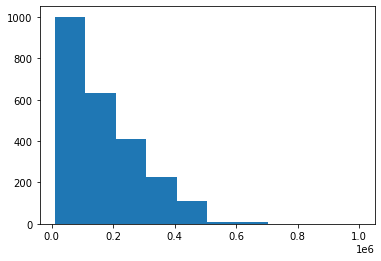

In [27]:
## Histogram of limit balance of customers
plt.hist(df['Limit_Balance'])

(array([432., 561., 546., 334., 214., 194.,  80.,  20.,   9.,   6.]),
 array([21. , 26.4, 31.8, 37.2, 42.6, 48. , 53.4, 58.8, 64.2, 69.6, 75. ]),
 <BarContainer object of 10 artists>)

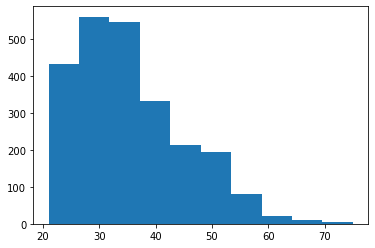

In [28]:
## histogram of ages of customers
plt.hist(df['Age'])

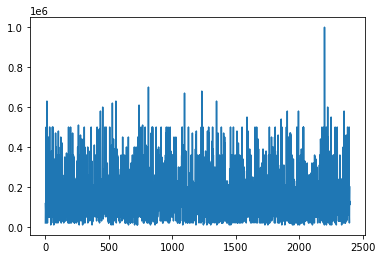

In [29]:
plt.plot(df['Limit_Balance'])

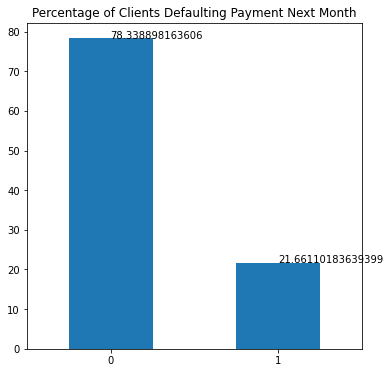

In [30]:
##Bar graph depicting percentage of clients who will default payment next month
## 77.7% are not expected to default, while the other 22.3% are expected to default
defaultcount = (df.Default.value_counts(normalize=True)*100)
defaultcount.plot.bar(figsize=(6,6))
plt.xticks(rotation=0)
plt.title('Percentage of Clients Defaulting Payment Next Month')
for x,y in zip([0,1], defaultcount):
    plt.text(x,y,y)
plt.show()

C:\Users\Public\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


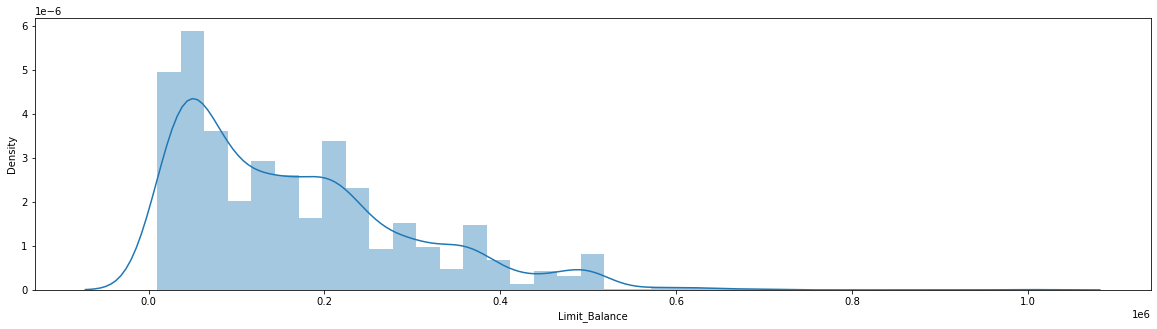

In [31]:
plt.subplots(figsize=(20,5))
sns.distplot(df.Limit_Balance)
plt.show()

In [32]:
## Limit balance distribution shows that most balances are usually less than 220k

C:\Users\Public\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


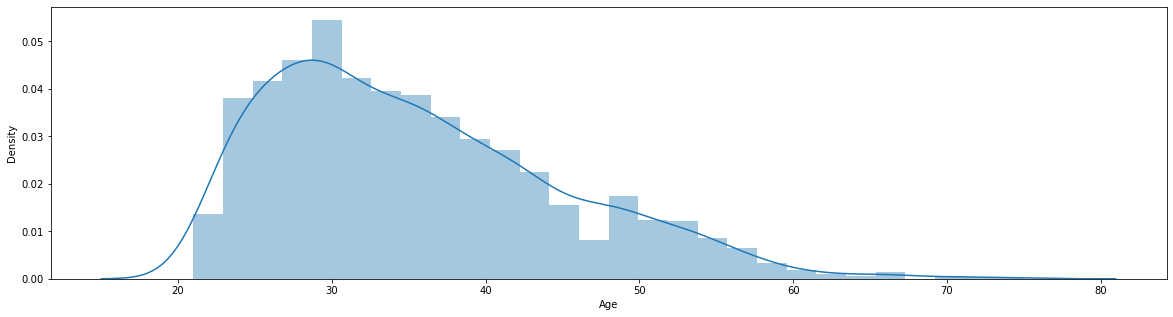

In [33]:
plt.subplots(figsize=(20,5))
sns.distplot(df.Age)
plt.show()

In [34]:
## Age distribution shows more clients between ages of 20-40 

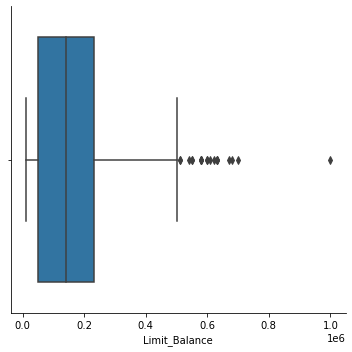

In [35]:
sns.catplot(x= 'Limit_Balance', kind = 'box', data= df)

In [36]:
## Most limit balances are less than 250k with outliers as high as a million dollars

In [37]:
## Creating bins for age ranges in decades
age_bins = [20,30,40,50,60,70,80]
age_names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['Age_Range'] = pd.cut(x=df.Age, bins=age_bins, labels=age_names, right=True)

In [38]:
## Creating counts of customers defaulting and not defaulting in these age range bins
age_count = df.Age_Range.value_counts()
age_nodef = (df.Age_Range[df['Default'] == 0].value_counts().sort_index())
age_def = (df.Age_Range[df['Default'] == 1].value_counts().sort_index())

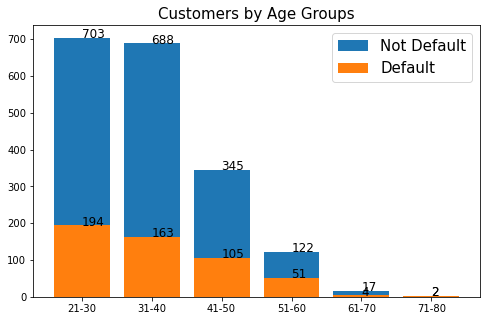

In [39]:
## Plotting counts of customers defaulting and not defaulting in these age range bins
plt.subplots(figsize=(8,5))
plt.bar(age_nodef.index, age_nodef.values, label='Not Default')
plt.bar(age_def.index, age_def.values, label='Default')
plt.legend(loc='upper right', fontsize=15)
plt.title("Customers by Age Groups", fontsize=15)
for x,y in zip(age_names,age_nodef):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(age_names,age_def):
    plt.text(x,y,y,fontsize=12)

In [40]:
### From graph above we see that customers defaulting the following month decreases with increasing age group. The largest age groups are 21-30 and 31-40

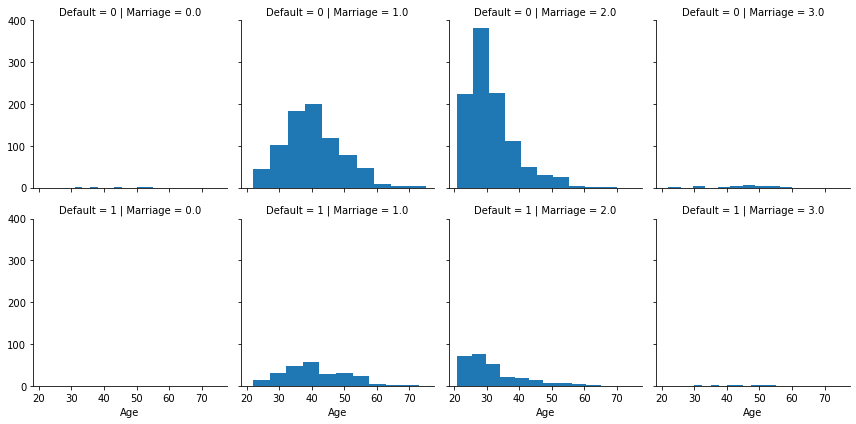

In [41]:
fig = sns.FacetGrid(df, row='Default', col='Marriage')
fig = fig.map(plt.hist, 'Age')
plt.show()

In [42]:
## Marital Status 1 (Married) and Marital Status 2 (Single)
## Default 1 (Default next month) and Default 0 (Not defaulting next month)
## From the above graph we see that single customers between 21-30 and married customers between 31-40 have the highest counts to default the next month.

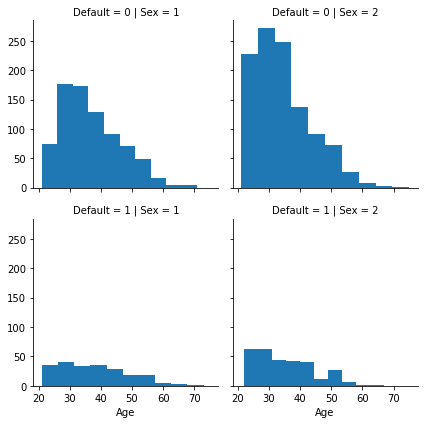

In [43]:
fig = sns.FacetGrid(df, row='Default', col='Sex')
fig = fig.map(plt.hist, 'Age')

In [44]:
## Sex of 1 (Male) and Sex of 2 (Female)
## Default 1 (Default next month) and Default 0 (Not defaulting next month)
## For both males and females, the age group of 21-30 had the highest defaulting counts
## Females had higher counts of not defaulting the next month

In [45]:
df.corr()

,Limit_Balance,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6,Default
Limit_Balance,1.000000,0.013084,-0.224870,-0.147788,0.154974,-0.200540,-0.248233,-0.236194,-0.224340,-0.213442,...,0.375659,0.365777,0.356559,0.264026,0.269277,0.233681,0.194202,0.222636,0.208182,-0.084348
Sex,0.013084,1.000000,0.044964,-0.028791,-0.117227,-0.035623,-0.063752,-0.050640,-0.038189,-0.044360,...,-0.043453,-0.038864,-0.042528,0.014640,0.001990,0.002756,-0.009158,-0.036136,-0.020722,-0.005722
Education,-0.224870,0.044964,1.000000,-0.143591,0.200034,0.121776,0.154527,0.134306,0.123566,0.109338,...,-0.010160,-0.004909,-0.001433,-0.061761,-0.059794,-0.032963,-0.035369,-0.059790,-0.029133,0.043295
Marriage,-0.147788,-0.028791,-0.143591,1.000000,-0.420270,0.025893,0.037293,0.038955,0.046826,0.044533,...,-0.038152,-0.038991,-0.043290,-0.038972,-0.067744,-0.026502,-0.010184,-0.036915,-0.018371,-0.025237
Age,0.154974,-0.117227,0.200034,-0.420270,1.000000,-0.017835,-0.029903,-0.037790,-0.024571,-0.012634,...,0.058714,0.052104,0.064045,0.035845,0.071416,0.040490,-0.007273,0.026600,0.037726,0.039677
Pay_1,-0.200540,-0.035623,0.121776,0.025893,-0.017835,1.000000,0.637668,0.547805,0.497509,0.472577,...,0.174051,0.180882,0.176785,-0.104246,-0.117068,-0.031079,-0.061638,-0.042064,-0.066021,0.288299
Pay_2,-0.248233,-0.063752,0.154527,0.037293,-0.029903,0.637668,1.000000,0.763806,0.667189,0.639244,...,0.229723,0.233963,0.223571,-0.067889,-0.069403,-0.016359,-0.041619,-0.036875,-0.025573,0.202049
Pay_3,-0.236194,-0.050640,0.134306,0.038955,-0.037790,0.547805,0.763806,1.000000,0.812452,0.724154,...,0.221919,0.223246,0.217238,-0.003731,-0.091800,-0.018293,-0.049315,-0.032942,-0.027555,0.206223
Pay_4,-0.224340,-0.038189,0.123566,0.046826,-0.024571,0.497509,0.667189,0.812452,1.000000,0.835864,...,0.249450,0.254886,0.244399,-0.014056,0.007803,-0.044739,-0.026550,-0.022711,-0.009108,0.172565
Pay_5,-0.213442,-0.044360,0.109338,0.044533,-0.012634,0.472577,0.639244,0.724154,0.835864,1.000000,...,0.274443,0.280365,0.263086,-0.019604,0.016144,0.013515,-0.056271,-0.038557,-0.007577,0.187247


In [46]:
## From the continuous variables of age and limit balance, limit balance had the strongest correlation to default status
## From the variables of limit balance, sex, education, marriage, and age, the relationship order from strongest correlated to least correlated is Limit Balance > Education > Age > Sex > Marriage
## Between Repayment Status (Pay_#), Bill Amount (Bill_#), and Previous Payment (PaidAmt_#), Repayment Status had the strongest relationship

In [47]:
df.cov()

,Limit_Balance,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6,Default
Limit_Balance,1.676861e+10,837.052708,-21258.245301,-10058.566644,189691.134493,-29175.023787,-38827.576232,-38152.885289,-34173.974718,-31971.107029,...,3.313588e+09,3.046906e+09,3.022809e+09,4.684651e+08,5.096867e+08,6.704545e+08,3.584094e+08,4.871168e+08,5.412305e+08,-4500.301477
Sex,8.370527e+02,0.244076,0.016217,-0.007476,-0.547430,-0.019772,-0.038044,-0.031208,-0.022194,-0.025351,...,-1.462298e+03,-1.235106e+03,-1.375511e+03,9.910068e+01,1.436873e+01,3.017076e+01,-6.448140e+01,-3.016448e+02,-2.055320e+02,-0.001165
Education,-2.125825e+04,0.016217,0.532960,-0.055096,1.380357,0.099878,0.136265,0.122308,0.106118,0.092331,...,-5.052212e+02,-2.305320e+02,-6.848788e+01,-6.177935e+02,-6.380567e+02,-5.331806e+02,-3.680018e+02,-7.375042e+02,-4.269922e+02,0.013023
Marriage,-1.005857e+04,-0.007476,-0.055096,0.276248,-2.087939,0.015290,0.023676,0.025540,0.028952,0.027074,...,-1.365927e+03,-1.318268e+03,-1.489604e+03,-2.806649e+02,-5.204494e+02,-3.086266e+02,-7.628665e+01,-3.278277e+02,-1.938567e+02,-0.005465
Age,1.896911e+05,-0.547430,1.380357,-2.087939,89.346812,-0.189402,-0.341421,-0.445582,-0.273211,-0.138139,...,3.780395e+04,3.168147e+04,3.963260e+04,4.642481e+03,9.867140e+03,8.479786e+03,-9.797593e+02,4.248226e+03,7.159267e+03,0.154526
Pay_1,-2.917502e+04,-0.019772,0.099878,0.015290,-0.189402,1.262192,0.865345,0.767712,0.657512,0.614136,...,1.331974e+04,1.307230e+04,1.300282e+04,-1.604735e+03,-1.922451e+03,-7.736183e+02,-9.869318e+02,-7.984763e+02,-1.489141e+03,0.133452
Pay_2,-3.882758e+04,-0.038044,0.136265,0.023676,-0.341421,0.865345,1.459028,1.150865,0.948026,0.893157,...,1.890132e+04,1.817914e+04,1.767979e+04,-1.123599e+03,-1.225366e+03,-4.378192e+02,-7.164820e+02,-7.525734e+02,-6.201559e+02,0.100556
Pay_3,-3.815289e+04,-0.031208,0.122308,0.025540,-0.445582,0.767712,1.150865,1.556034,1.192194,1.044888,...,1.885650e+04,1.791381e+04,1.774094e+04,-6.377737e+01,-1.673814e+03,-5.055860e+02,-8.767380e+02,-6.943027e+02,-6.900822e+02,0.105990
Pay_4,-3.417397e+04,-0.022194,0.106118,0.028952,-0.273211,0.657512,0.948026,1.192194,1.383820,1.137378,...,1.998845e+04,1.928767e+04,1.882220e+04,-2.265675e+02,1.341637e+02,-1.166057e+03,-4.451187e+02,-4.514068e+02,-2.150971e+02,0.083640
Pay_5,-3.197111e+04,-0.025351,0.092331,0.027074,-0.138139,0.614136,0.893157,1.044888,1.137378,1.338008,...,2.162406e+04,2.086156e+04,1.992315e+04,-3.107134e+02,2.729526e+02,3.463712e+02,-9.276604e+02,-7.535602e+02,-1.759709e+02,0.089241


In [48]:
education_count = df.Education.value_counts()
education_nodef = (df.Education[df['Default'] == 0].value_counts().sort_index())
education_def = (df.Education[df['Default'] == 1].value_counts().sort_index())

Text(0.5, 1.0, 'Customers Education')

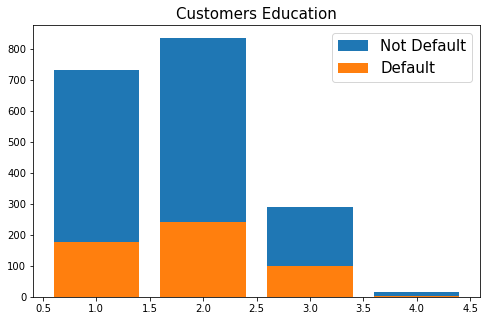

In [49]:
plt.subplots(figsize=(8,5))
plt.bar(education_nodef.index, education_nodef.values, label='Not Default')
plt.bar(education_def.index, education_def.values, label='Default')
plt.legend(loc='upper right', fontsize=15)
plt.title("Customers Education", fontsize=15)

In [50]:
## Education 1 = Graduate School, Education 2 = University, Education 3 = High School, Education 4 = Other
## University educated customers had the higher counts for defaulting followed by Graduate School educated customers

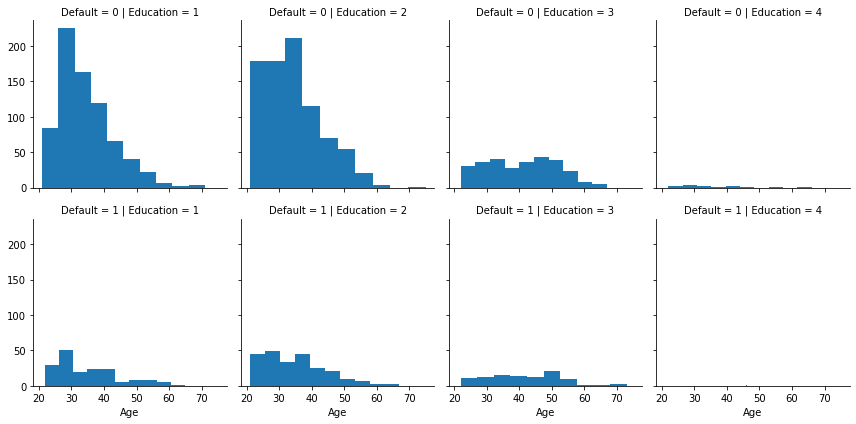

In [51]:
fig = sns.FacetGrid(df, row='Default', col='Education')
fig = fig.map(plt.hist, 'Age')

In [52]:
repay1_count = df.Pay_1.value_counts()
repay1_nodef = (df.Pay_1[df['Default'] == 0].value_counts().sort_index())
repay1_def = (df.Pay_1[df['Default'] == 1].value_counts().sort_index())

Text(0.5, 1.0, 'Customer Credit Behavior (Most Recent Month)')

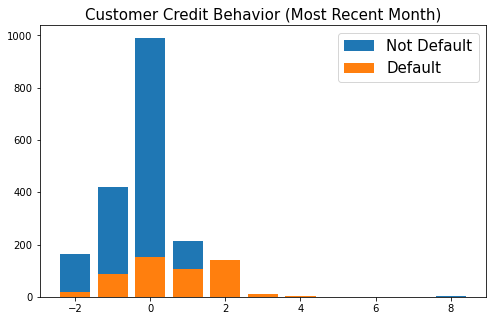

In [53]:
plt.subplots(figsize=(8,5))
plt.bar(repay1_nodef.index, repay1_nodef.values, label='Not Default')
plt.bar(repay1_def.index, repay1_def.values, label='Default')
plt.legend(loc='upper right', fontsize=15)
plt.title("Customer Credit Behavior (Most Recent Month)", fontsize=15)

In [54]:
## From the most recent repayment month status, most customers are using revolving credit
## Second largest grouping is fully paid
## Some customers who have not delayed payment (using revolving credit, paid in full, or no consumption), will still default

In [55]:
lb_bins = [0, 50000,100000,150000,200000, 250000,300000, 350000,400000, 450000,500000, 550000,600000, 650000,700000, 750000,800000, 850000,900000, 950000,1000000]
lb_names = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k','500k-550k', '550k-600k', '600k-650k', '650k-700k', '700k-750k', '750k-800k', '800k-850k', '850k-900k','900k-950k', '950k-1Mil']
df['Limit_Balance_Ranges'] = pd.cut(x=df.Limit_Balance, bins=lb_bins, labels=lb_names, right=True)
lb_count = df.Limit_Balance_Ranges.value_counts()
lb_nodef = (df.Limit_Balance_Ranges[df['Default'] == 0].value_counts().sort_index())
lb_def = (df.Limit_Balance_Ranges[df['Default'] == 1].value_counts().sort_index())

Text(0.5, 1.0, 'Limit Balances and Defaulting')

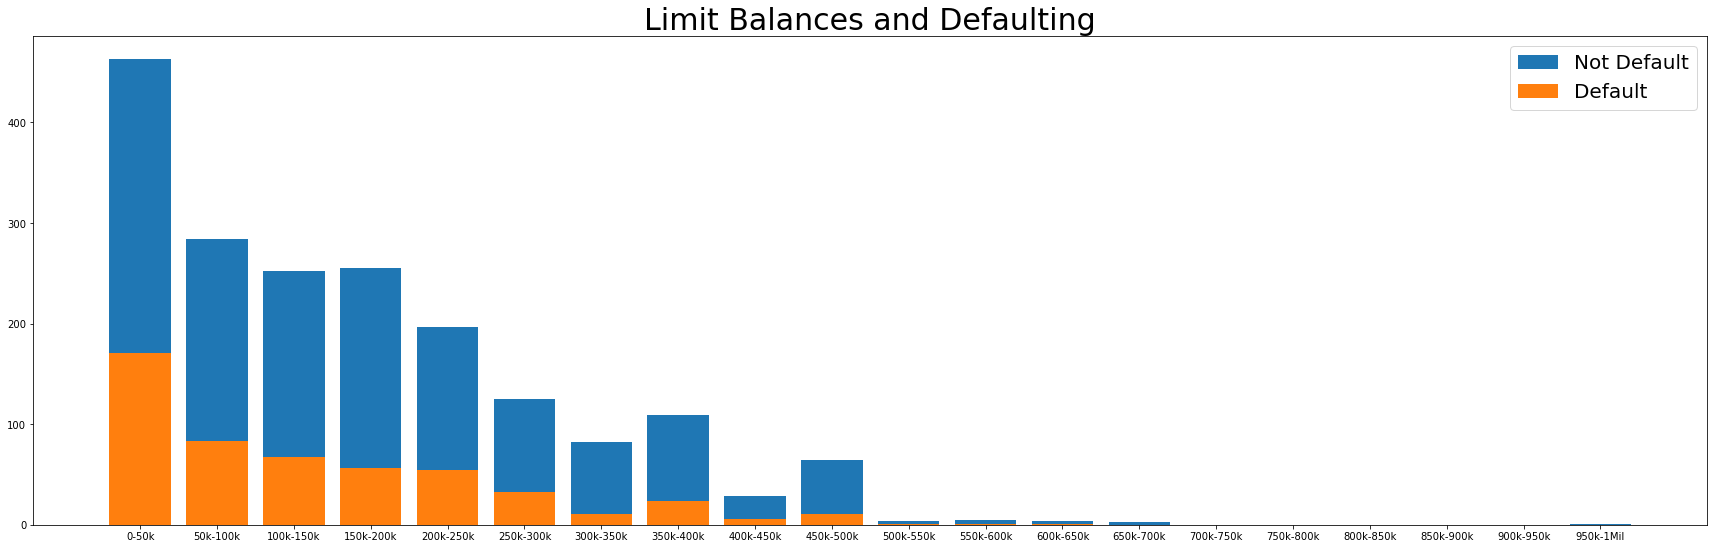

In [56]:
plt.subplots(figsize=(30,9))
plt.bar(lb_nodef.index, lb_nodef.values, label='Not Default')
plt.bar(lb_def.index, lb_def.values, label='Default')
plt.legend(loc='upper right', fontsize=20)
plt.title("Limit Balances and Defaulting", fontsize=30)

In [57]:
## From this we see that as limit balance increases defaulting is also decreasing
## 0-50k is the largest group in defaulting counts

In [58]:
print([df['Age'].isnull()])

[1       False
2       False
3       False
4       False
5       False
        ...  
2393    False
2394    False
2395    False
2396    False
2397    False
Name: Age, Length: 2396, dtype: bool]


In [59]:
#Modeling using the three algorithms 
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [60]:
#Setting default status as the dependent variable and limit balance as the independent variable
x = df['Limit_Balance']

y = df['Default']

In [61]:
#Train and test for age dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)
x_train = x_train.to_numpy().reshape(-1,1)
x_test = x_test.to_numpy().reshape(-1,1)

In [62]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.0502696835424048
Linear Regression 0.004162243250693291
Support Vector Regression -0.08646201592646167


In [63]:
##Using Support Vector Regression as the model here
algo = SVR()
svr1 = algo.fit(x_train, y_train)

preds = svr1.predict(x_test)
rmse = sqrt(mean_squared_error (y_test, preds))
predRsquared = r2_score(y_test, preds)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.067
RMSE: 0.417


In [64]:
##Only 6.7% regression model accuracy using SVR with Limit Balance as independent variable and default status as dependent variable

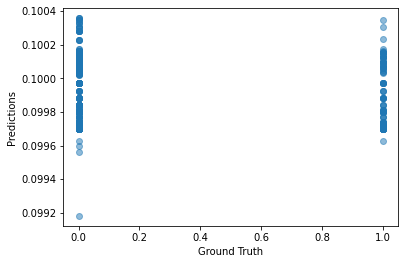

In [65]:
plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [66]:
##We cannot use any algorithm to predict default status as default status is binary (categorical)

In [67]:
#All features as independent variable
x = df.iloc[:,1:24]
print('Summary of feature sample')
x.head()

Summary of feature sample


,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,...,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6,Default
1,2,2,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,2,2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,2,2,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,2,2,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,1,2,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [68]:
#dependent variable
y = df['Default']
print(y)

1       1
2       1
3       0
4       0
5       0
       ..
2393    1
2394    0
2395    0
2396    0
2397    0
Name: Default, Length: 2396, dtype: int32


In [69]:
#Train and test for all features as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [70]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 1.0
Linear Regression 1.0
Support Vector Regression -0.08626300347038411


In [71]:
##Linear Regression Model
algo = LinearRegression()
lr1 = algo.fit(x_train, y_train)

preds = lr1.predict(x_test)
rmse = sqrt(mean_squared_error (y_test, preds))
predRsquared = r2_score(y_test, preds)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 0.000


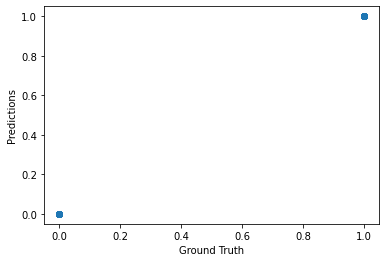

In [72]:
plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [73]:
##0% accuracry using linear regression model for all features as independent variable for default status as dependent variable
##We still cannot use any algorithm to predict default status as default status is binary (categorical)

In [74]:
#Modeling using the three algorithms 
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [75]:
##Modeling limit balance as the dependent variable
#Setting Limit Balance as the dependent variable and age as the independent variable
x = df['Age']

y = df['Limit_Balance']

In [76]:
#Train and test for age independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)
x_train = x_train.to_numpy().reshape(-1,1)
x_test = x_test.to_numpy().reshape(-1,1)

In [77]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.06485189271762137
Linear Regression 0.028709922078519596
Support Vector Regression -0.05156804057877166


In [78]:
##Only 6% accuracy for RFR model by using only age as the independent variable and limit balance as dependent variable

In [79]:
##Random Forest Regressor model
algo = RandomForestRegressor()
lr1 = algo.fit(x_train, y_train)

preds = lr1.predict(x_test)
rmse = sqrt(mean_squared_error (y_test, preds))
predRsquared = r2_score(y_test, preds)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.036
RMSE: 127136.987


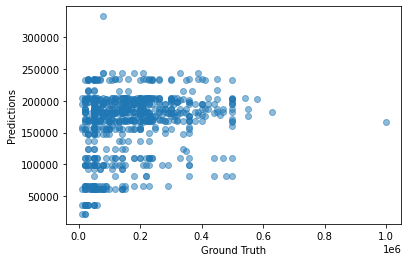

In [80]:
plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [81]:
#Using all features as independent variable for modeling limit balance as dependent variable
x = df.iloc[:,1:23]
print('Summary of feature sample')
x.head()

Summary of feature sample


,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,...,Bill_3,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6
1,2,2,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,2,2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,2,2,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,2,2,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,1,2,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [82]:
#Limit Balance as dependent variable
y = df['Limit_Balance']
print(y)

1        20000.0
2       120000.0
3        90000.0
4        50000.0
5        50000.0
          ...   
2393     50000.0
2394     20000.0
2395    130000.0
2396    110000.0
2397    200000.0
Name: Limit_Balance, Length: 2396, dtype: float64


In [83]:
#Train and test for all features as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [84]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4348098501715884
Linear Regression 0.36118466609226973
Support Vector Regression -0.05146172172227385


In [85]:
##Random Forest Regressor model
algo = RandomForestRegressor()
rfr1 = algo.fit(x_train, y_train)

preds = rfr1.predict(x_test)
rmse = sqrt(mean_squared_error (y_test, preds))
predRsquared = r2_score(y_test, preds)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.402
RMSE: 100130.512


In [86]:
##Able to achieve 40.2% accuracy for RFR model with all features as independent variable and limit balance as dependent variable

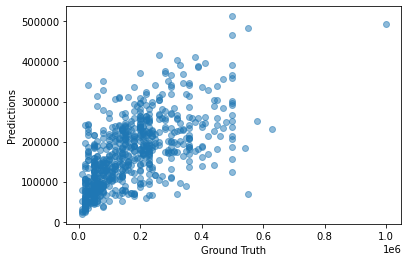

In [87]:
plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [88]:
#Using all demographic data and payment amounts as features
x = df.iloc[:,1:11]
print('Summary of feature sample')
x.head()

Summary of feature sample


,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6
1,2,2,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
2,2,2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0
3,2,2,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,2,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [89]:
#Limit Balance as dependent variable
y = df['Limit_Balance']
print(y)

1        20000.0
2       120000.0
3        90000.0
4        50000.0
5        50000.0
          ...   
2393     50000.0
2394     20000.0
2395    130000.0
2396    110000.0
2397    200000.0
Name: Limit_Balance, Length: 2396, dtype: float64


In [90]:
#Train and test for demographic data and payment amounts as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [91]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.048823925442577076
Linear Regression 0.13029305022734702
Support Vector Regression -0.051772419693060234


In [92]:
##Linear Regression model
algo = LinearRegression()
lr1 = algo.fit(x_train, y_train)

preds = lr1.predict(x_test)
rmse = sqrt(mean_squared_error (y_test, preds))
predRsquared = r2_score(y_test, preds)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.164
RMSE: 118414.335


In [93]:
##Only 16% using demographic data and payment amounts

In [94]:
#Using only payment amounts as features
x = df.iloc[:,5:11]
print('Summary of feature sample')
x.head()

Summary of feature sample


,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6
1,2.0,2.0,-1.0,-1.0,-2.0,-2.0
2,-1.0,2.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.0,0.0,-1.0,0.0,0.0,0.0


In [95]:
#Limit Balance as dependent variable
y = df['Limit_Balance']
print(y)

1        20000.0
2       120000.0
3        90000.0
4        50000.0
5        50000.0
          ...   
2393     50000.0
2394     20000.0
2395    130000.0
2396    110000.0
2397    200000.0
Name: Limit_Balance, Length: 2396, dtype: float64


In [96]:
#Train and test payment amounts as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [97]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.05395243130135049
Linear Regression 0.054851059827129754
Support Vector Regression -0.05164272037062171


In [98]:
##Linear Regression model
algo = LinearRegression()
lr1 = algo.fit(x_train, y_train)

preds = lr1.predict(x_test)
rmse = sqrt(mean_squared_error (y_test, preds))
predRsquared = r2_score(y_test, preds)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.092
RMSE: 123369.999


In [99]:
##Only 9.2% accuracy using linear regression model with only payment amounts as the independent variable

In [100]:
#Using only demographic data as features
x = df.iloc[:,1:5]
print('Summary of feature sample')
x.head()

Summary of feature sample


,Sex,Education,Marriage,Age
1,2,2,1.0,24.0
2,2,2,2.0,26.0
3,2,2,2.0,34.0
4,2,2,1.0,37.0
5,1,2,1.0,57.0


In [101]:
#Limit Balance as dependent variable
y = df['Limit_Balance']
print(y)

1        20000.0
2       120000.0
3        90000.0
4        50000.0
5        50000.0
          ...   
2393     50000.0
2394     20000.0
2395    130000.0
2396    110000.0
2397    200000.0
Name: Limit_Balance, Length: 2396, dtype: float64


In [102]:
#Train and test for demographic data as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [103]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.03746410204761667
Linear Regression 0.09563252465629628
Support Vector Regression -0.05176548250310242


In [104]:
##Linear Regression model
algo = LinearRegression()
lr1 = algo.fit(x_train, y_train)

preds = lr1.predict(x_test)
rmse = sqrt(mean_squared_error (y_test, preds))
predRsquared = r2_score(y_test, preds)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.109
RMSE: 122241.697


In [105]:
##Only 10% accuracy using linear regression model with demographic data as the features for independent variable

In [ ]:
###Switch from regression to classification modeling as regression yielding poor results
###Using limit balance as dependent variable with all features for classification modeling

In [175]:
algos_class = []
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

In [176]:
# Discretize limit balance
discr_limit = ([0, 50000, 100000, 200000, 300000, 400000, 500000, 1000000])
df['limit_label'] = pd.cut(df['Limit_Balance'], discr_limit, labels = False)

In [177]:
# Set discretized limit balance as the dependent variable
y=df['limit_label']
y.head(5)

1    0
2    2
3    1
4    0
5    0
Name: limit_label, dtype: int64

In [178]:
# Use all features for independent variables
x = df.iloc[:,1:24]
x.head(5)

,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,...,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6,Default
1,2,2,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,2,2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,2,2,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,2,2,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,1,2,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [179]:
#Train and test for all features as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [180]:
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, x, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
   print(names[i],results[i].mean())
# All models are performing poorly with best performance at ~47%
# Random Forest Classifier is the best performer at 47%
# No model useful for prediction

Decision Tree Classifier 0.36726568193533476
Random Forest Classifier 0.47913065935594096
GradientBoostingClassifier 0.46910977903666123


In [181]:
# Select RandomForestClassifier as model
algo=RandomForestClassifier()

In [182]:
rfc1 = algo.fit(x_train, y_train)
preds = rfc1.predict(x_test)
print(classification_report(y_test, preds,
                           target_names=['0-49,999','50,000-99,999','100,000-199,999',
                                         '200,000-299,999', '300,000-399,999',
                                         '400,000-499,999', '500,000-1,000,000'],
                           zero_division=0))

#poor predictor at 47% accuracy

                   precision    recall  f1-score   support

         0-49,999       0.62      0.83      0.71       180
    50,000-99,999       0.55      0.43      0.48       109
  100,000-199,999       0.40      0.52      0.45       194
  200,000-299,999       0.33      0.23      0.27       133
  300,000-399,999       0.26      0.16      0.20        61
  400,000-499,999       0.38      0.08      0.14        36
500,000-1,000,000       0.00      0.00      0.00         6

         accuracy                           0.47       719
        macro avg       0.36      0.32      0.32       719
     weighted avg       0.45      0.47      0.45       719



In [183]:
###Using default as dependent variable with all features for classification modeling

In [184]:
algos_class = []
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

In [185]:
# Set default as the dependent variable
y=df['Default']
y.head(5)

1    1
2    1
3    0
4    0
5    0
Name: Default, dtype: int32

In [188]:
# Use all features for independent variables
x = df.iloc[:,1:23]
x.head(5)

,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,...,Bill_3,Bill_4,Bill_5,Bill_6,PaidAmt_1,PaidAmt_2,PaidAmt_3,PaidAmt_4,PaidAmt_5,PaidAmt_6
1,2,2,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,2,2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,2,2,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,2,2,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,1,2,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [189]:
#Train and test for all features as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [190]:
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, x, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
   print(names[i],results[i].mean())
# Much better results using default as the dependent variable with 80.8% accuracy using gradient boosting classifier and a similar accuracy of 80% for random forest classifier

Decision Tree Classifier 0.7145256758918572
Random Forest Classifier 0.800084796890014
GradientBoostingClassifier 0.8084353562253569


In [191]:
# Select Gradient Boosting Classifier as model
algo=GradientBoostingClassifier()

In [192]:
gbc1 = algo.fit(x_train, y_train)
preds = gbc1.predict(x_test)
print(classification_report(y_test, preds,))

#good predictor at 82% accuracy

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       572
           1       0.64      0.31      0.41       147

    accuracy                           0.82       719
   macro avg       0.74      0.63      0.66       719
weighted avg       0.80      0.82      0.80       719



In [194]:
##Using only demographic information as features
x = df.iloc[:,1:5]
x.head(5)

,Sex,Education,Marriage,Age
1,2,2,1.0,24.0
2,2,2,2.0,26.0
3,2,2,2.0,34.0
4,2,2,1.0,37.0
5,1,2,1.0,57.0


In [195]:
# Set default as the dependent variable
y=df['Default']
y.head(5)

1    1
2    1
3    0
4    0
5    0
Name: Default, dtype: int32

In [196]:
algos_class = []
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

In [197]:
#Train and test for demographic data as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [198]:
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, x, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
   print(names[i],results[i].mean())
# Results are good at 78% using gradient boosting

Decision Tree Classifier 0.7454117145178341
Random Forest Classifier 0.7433236825898706
GradientBoostingClassifier 0.7796326443978114


In [199]:
# Select Gradient Boosting Classifier as model
algo=GradientBoostingClassifier()

In [200]:
gbc1 = algo.fit(x_train, y_train)
preds = gbc1.predict(x_test)
print(classification_report(y_test, preds,))

#good predictor at 80% accuracy

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       572
           1       0.00      0.00      0.00       147

    accuracy                           0.80       719
   macro avg       0.40      0.50      0.44       719
weighted avg       0.63      0.80      0.70       719



C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
##Using only payment amounts as features
x = df.iloc[:,5:11]
x.head(5)

,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6
1,2.0,2.0,-1.0,-1.0,-2.0,-2.0
2,-1.0,2.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.0,0.0,-1.0,0.0,0.0,0.0


In [202]:
# Set default as the dependent variable
y=df['Default']
y.head(5)

1    1
2    1
3    0
4    0
5    0
Name: Default, dtype: int32

In [203]:
algos_class = []
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

In [204]:
#Train and test for payment amounts as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [205]:
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, x, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
   print(names[i],results[i].mean())
# Results are good at 80% using gradient boosting

Decision Tree Classifier 0.7959129153714491
Random Forest Classifier 0.7988337552266147
GradientBoostingClassifier 0.8013394980986049


In [206]:
gbc1 = algo.fit(x_train, y_train)
preds = gbc1.predict(x_test)
print(classification_report(y_test, preds,))

#good predictor at 82% accuracy

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       572
           1       0.62      0.31      0.41       147

    accuracy                           0.82       719
   macro avg       0.73      0.63      0.65       719
weighted avg       0.80      0.82      0.79       719



In [222]:
##Using only demographic data and payment amounts as features
x = df.iloc[:,1:11]
x.head(5)

,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6
1,2,2,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
2,2,2,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0
3,2,2,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,2,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [223]:
# Set default as the dependent variable
y=df['Default']
y.head(5)

1    1
2    1
3    0
4    0
5    0
Name: Default, dtype: int32

In [224]:
algos_class = []
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

In [225]:
#Train and test for demographic data and payment amounts as independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [226]:
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, x, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
   print(names[i],results[i].mean())
# Results are good at 80% using gradient boosting

Decision Tree Classifier 0.7349757372153789
Random Forest Classifier 0.7767133729191564
GradientBoostingClassifier 0.8080165996969897


In [227]:
gbc1 = algo.fit(x_train, y_train)
preds = gbc1.predict(x_test)
print(classification_report(y_test, preds,))

#good predictor at 81% accuracy

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       572
           1       0.60      0.27      0.37       147

    accuracy                           0.81       719
   macro avg       0.72      0.61      0.63       719
weighted avg       0.79      0.81      0.78       719

